In [1]:
import os

PROJECT_DIR = './'
DATASET_DIR = './dataset'
MODELS_DIR = './models'
TRAIN_FILE = os.path.join(DATASET_DIR, 'train.tsv')
TEST_FILE = os.path.join(DATASET_DIR, 'test.tsv')
DEV_FILE = os.path.join(DATASET_DIR, 'dev.tsv')
LOG_DIR = os.path.join(PROJECT_DIR, 'logs')

In [2]:
TRAIN_TEST_RATIO = 0.2

bert_settings = {
    'max_seq_length': 128,
    'num_train_epochs': 4,
    'train_batch_size': 16,
    'eval_batch_size': 16,
    'learning_rate': 1e-5,
    'adam_epsilon': 1e-8,
    'test_size': TRAIN_TEST_RATIO,
    'log_dir': LOG_DIR,
    'tb_suffix': 'bert'
}

lstm_settings = {
    'max_seq_length': 128,
    'num_train_epochs': 30,
    'train_batch_size': 32,
    'eval_batch_size': 32,
    'test_size': TRAIN_TEST_RATIO,
    'log_dir': LOG_DIR,
    'tb_suffix': 'lstm'
}

distillation_settings = {
    'max_seq_length': 128,
    'num_train_epochs': 30,
    'train_batch_size': 32,
    'eval_batch_size': 32,
    'test_size': TRAIN_TEST_RATIO,
    'log_dir': LOG_DIR,
    'tb_suffix': 'd_lstm'
}

In [3]:
from utils.bert_data import df_to_dataset
from utils.bert_trainer import BertTrainer
from utils.utils import get_logger, set_seed

In [4]:
logger = get_logger()
set_seed(3)

In [5]:
import pandas as pd

In [6]:
train_df = pd.read_csv(TRAIN_FILE, encoding='utf-8', sep='\t')

In [7]:
from transformers import BertTokenizer

bert_model = BertTrainer(bert_settings, logger).train(df_to_dataset(train_df, BertTokenizer.from_pretrained('bert-base-uncased'), bert_settings['max_seq_length']), MODELS_DIR)

2022-05-29 02:54:03,778 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 02:54:04,552 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/vocab.txt HTTP/1.1" 200 0
2022-05-29 02:54:04,559 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 02:54:05,371 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/added_tokens.json HTTP/1.1" 404 0
2022-05-29 02:54:05,377 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 02:54:06,190 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/special_tokens_map.json HTTP/1.1" 404 0
2022-05-29 02:54:06,192 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 02:54:07,009 - urllib3.connectionpool - DEBUG - https://huggingfa

100%|██████████| 67349/67349 [00:07<00:00, 9454.57it/s] 


2022-05-29 02:54:17,360 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 02:54:18,171 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/config.json HTTP/1.1" 200 0
2022-05-29 02:54:18,180 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 02:54:18,888 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/pytorch_model.bin HTTP/1.1" 302 0


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

2022-05-29 07:01:35,090 - root - INFO - ######## epoch=0 ########
2022-05-29 07:01:35,091 - root - INFO - train_loss=0.2233, val_loss=0.1444, acc=0.9498



Evaluating: 100%|██████████| 842/842 [18:36<00:00,  1.33s/it]

2022-05-29 11:10:42,910 - root - INFO - ######## epoch=1 ########
2022-05-29 11:10:42,910 - root - INFO - train_loss=0.1162, val_loss=0.1372, acc=0.9537



Evaluating: 100%|██████████| 842/842 [18:10<00:00,  1.30s/it]

2022-05-29 15:21:20,977 - root - INFO - ######## epoch=2 ########
2022-05-29 15:21:20,977 - root - INFO - train_loss=0.0762, val_loss=0.1508, acc=0.9532



Evaluating: 100%|██████████| 842/842 [18:00<00:00,  1.28s/it]

2022-05-29 19:30:10,952 - root - INFO - ######## epoch=3 ########
2022-05-29 19:30:10,953 - root - INFO - train_loss=0.0501, val_loss=0.1678, acc=0.9520


In [8]:
from utils.lstm_trainer import LSTMBaseline

y_lstm_base_train = train_df['label'].values
lstm_base_model, lstm_base_vocab = LSTMBaseline(lstm_settings, logger).train(train_df['sentence'].values, y_lstm_base_train, y_lstm_base_train, MODELS_DIR)

/usr/local/lib/python3.9/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
to index: 100%|██████████| 13470/13470 [00:00<00:00, 87184.19it/s]


2022-05-29 19:30:18,077 - root - INFO - # of trainable params 161730


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Val: 100%|██████████| 420/420 [00:07<00:00, 54.57it/s]

2022-05-29 19:31:54,985 - root - INFO - ######## epoch=0 ########
2022-05-29 19:31:54,985 - root - INFO - train_loss=0.0206, val_loss=0.0177, acc=0.7089
2022-05-29 19:31:54,987 - root - INFO - save best model 0.0177
2022-05-29 19:31:54,989 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 59.25it/s]

2022-05-29 19:33:31,192 - root - INFO - ######## epoch=1 ########
2022-05-29 19:33:31,193 - root - INFO - train_loss=0.0162, val_loss=0.0140, acc=0.8004
2022-05-29 19:33:31,194 - root - INFO - save best model 0.0140
2022-05-29 19:33:31,196 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.12it/s]

2022-05-29 19:35:04,608 - root - INFO - ######## epoch=2 ########
2022-05-29 19:35:04,609 - root - INFO - train_loss=0.0133, val_loss=0.0118, acc=0.8409
2022-05-29 19:35:04,609 - root - INFO - save best model 0.0118
2022-05-29 19:35:04,612 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 62.54it/s]

2022-05-29 19:36:32,635 - root - INFO - ######## epoch=3 ########
2022-05-29 19:36:32,635 - root - INFO - train_loss=0.0114, val_loss=0.0106, acc=0.8606
2022-05-29 19:36:32,636 - root - INFO - save best model 0.0106
2022-05-29 19:36:32,638 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 62.49it/s]

2022-05-29 19:37:59,371 - root - INFO - ######## epoch=4 ########
2022-05-29 19:37:59,371 - root - INFO - train_loss=0.0102, val_loss=0.0099, acc=0.8747
2022-05-29 19:37:59,372 - root - INFO - save best model 0.0099
2022-05-29 19:37:59,374 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.07it/s]

2022-05-29 19:39:28,256 - root - INFO - ######## epoch=5 ########
2022-05-29 19:39:28,257 - root - INFO - train_loss=0.0092, val_loss=0.0093, acc=0.8835
2022-05-29 19:39:28,258 - root - INFO - save best model 0.0093
2022-05-29 19:39:28,259 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 61.34it/s]

2022-05-29 19:40:54,361 - root - INFO - ######## epoch=6 ########
2022-05-29 19:40:54,362 - root - INFO - train_loss=0.0085, val_loss=0.0092, acc=0.8885
2022-05-29 19:40:54,363 - root - INFO - save best model 0.0092
2022-05-29 19:40:54,364 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 58.51it/s]

2022-05-29 19:42:21,113 - root - INFO - ######## epoch=7 ########
2022-05-29 19:42:21,114 - root - INFO - train_loss=0.0078, val_loss=0.0087, acc=0.8941
2022-05-29 19:42:21,114 - root - INFO - save best model 0.0087
2022-05-29 19:42:21,117 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 63.00it/s]

2022-05-29 19:43:54,264 - root - INFO - ######## epoch=8 ########
2022-05-29 19:43:54,265 - root - INFO - train_loss=0.0074, val_loss=0.0090, acc=0.8948
2022-05-29 19:43:54,266 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 62.39it/s]

2022-05-29 19:45:19,481 - root - INFO - ######## epoch=9 ########
2022-05-29 19:45:19,482 - root - INFO - train_loss=0.0070, val_loss=0.0084, acc=0.8996
2022-05-29 19:45:19,482 - root - INFO - save best model 0.0084
2022-05-29 19:45:19,485 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 56.46it/s]

2022-05-29 19:46:45,433 - root - INFO - ######## epoch=10 ########
2022-05-29 19:46:45,433 - root - INFO - train_loss=0.0067, val_loss=0.0084, acc=0.9028
2022-05-29 19:46:45,434 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 58.07it/s]

2022-05-29 19:48:15,809 - root - INFO - ######## epoch=11 ########
2022-05-29 19:48:15,809 - root - INFO - train_loss=0.0064, val_loss=0.0083, acc=0.9036
2022-05-29 19:48:15,810 - root - INFO - save best model 0.0083
2022-05-29 19:48:15,812 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 62.25it/s]

2022-05-29 19:49:41,804 - root - INFO - ######## epoch=12 ########
2022-05-29 19:49:41,805 - root - INFO - train_loss=0.0061, val_loss=0.0083, acc=0.9054
2022-05-29 19:49:41,806 - root - INFO - save best model 0.0083
2022-05-29 19:49:41,807 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 56.08it/s]

2022-05-29 19:51:08,535 - root - INFO - ######## epoch=13 ########
2022-05-29 19:51:08,536 - root - INFO - train_loss=0.0059, val_loss=0.0083, acc=0.9062
2022-05-29 19:51:08,536 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 59.85it/s]

2022-05-29 19:52:36,784 - root - INFO - ######## epoch=14 ########
2022-05-29 19:52:36,784 - root - INFO - train_loss=0.0057, val_loss=0.0083, acc=0.9074
2022-05-29 19:52:36,785 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.78it/s]

2022-05-29 19:54:02,604 - root - INFO - ######## epoch=15 ########
2022-05-29 19:54:02,605 - root - INFO - train_loss=0.0055, val_loss=0.0082, acc=0.9086
2022-05-29 19:54:02,606 - root - INFO - save best model 0.0082
2022-05-29 19:54:02,608 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 61.07it/s]

2022-05-29 19:55:27,440 - root - INFO - ######## epoch=16 ########
2022-05-29 19:55:27,440 - root - INFO - train_loss=0.0054, val_loss=0.0084, acc=0.9100
2022-05-29 19:55:27,441 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.99it/s]

2022-05-29 19:56:54,997 - root - INFO - ######## epoch=17 ########
2022-05-29 19:56:54,998 - root - INFO - train_loss=0.0052, val_loss=0.0083, acc=0.9115
2022-05-29 19:56:54,998 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.24it/s]

2022-05-29 19:58:21,136 - root - INFO - ######## epoch=18 ########
2022-05-29 19:58:21,137 - root - INFO - train_loss=0.0051, val_loss=0.0083, acc=0.9112
2022-05-29 19:58:21,137 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.87it/s]

2022-05-29 19:59:47,750 - root - INFO - ######## epoch=19 ########
2022-05-29 19:59:47,751 - root - INFO - train_loss=0.0049, val_loss=0.0084, acc=0.9131
2022-05-29 19:59:47,752 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 61.28it/s]

2022-05-29 20:01:14,122 - root - INFO - ######## epoch=20 ########
2022-05-29 20:01:14,123 - root - INFO - train_loss=0.0048, val_loss=0.0084, acc=0.9118
2022-05-29 20:01:14,123 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.24it/s]

2022-05-29 20:02:39,135 - root - INFO - ######## epoch=21 ########
2022-05-29 20:02:39,136 - root - INFO - train_loss=0.0047, val_loss=0.0085, acc=0.9141
2022-05-29 20:02:39,137 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 55.40it/s]

2022-05-29 20:04:05,603 - root - INFO - ######## epoch=22 ########
2022-05-29 20:04:05,604 - root - INFO - train_loss=0.0046, val_loss=0.0085, acc=0.9153
2022-05-29 20:04:05,604 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.56it/s]

2022-05-29 20:05:32,423 - root - INFO - ######## epoch=23 ########
2022-05-29 20:05:32,423 - root - INFO - train_loss=0.0045, val_loss=0.0087, acc=0.9159
2022-05-29 20:05:32,424 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.64it/s]

2022-05-29 20:06:59,496 - root - INFO - ######## epoch=24 ########
2022-05-29 20:06:59,497 - root - INFO - train_loss=0.0044, val_loss=0.0088, acc=0.9124
2022-05-29 20:06:59,498 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 55.72it/s]

2022-05-29 20:08:25,357 - root - INFO - ######## epoch=25 ########
2022-05-29 20:08:25,357 - root - INFO - train_loss=0.0043, val_loss=0.0088, acc=0.9171
2022-05-29 20:08:25,358 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 62.11it/s]

2022-05-29 20:09:51,814 - root - INFO - ######## epoch=26 ########
2022-05-29 20:09:51,814 - root - INFO - train_loss=0.0041, val_loss=0.0089, acc=0.9182
2022-05-29 20:09:51,815 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.52it/s]

2022-05-29 20:11:19,256 - root - INFO - ######## epoch=27 ########
2022-05-29 20:11:19,256 - root - INFO - train_loss=0.0041, val_loss=0.0088, acc=0.9149
2022-05-29 20:11:19,257 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.73it/s]

2022-05-29 20:12:46,110 - root - INFO - ######## epoch=28 ########
2022-05-29 20:12:46,111 - root - INFO - train_loss=0.0040, val_loss=0.0092, acc=0.9174
2022-05-29 20:12:46,111 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 61.54it/s]

2022-05-29 20:14:13,148 - root - INFO - ######## epoch=29 ########
2022-05-29 20:14:13,149 - root - INFO - train_loss=0.0039, val_loss=0.0089, acc=0.9164


In [9]:
import numpy as np
import torch
from torch.utils.data import SequentialSampler, DataLoader
from tqdm import tqdm
from transformers import BertForSequenceClassification, BertTokenizer

from utils.bert_data import df_to_dataset
from utils.bert_trainer import batch_to_inputs
from utils.lstm_trainer import LSTMDistilled


bert_model_cl = BertForSequenceClassification.from_pretrained(MODELS_DIR)

bert_dist_train_dataset = df_to_dataset(train_df, BertTokenizer.from_pretrained('bert-base-uncased'), distillation_settings['max_seq_length'])
bert_dist_data = DataLoader(bert_dist_train_dataset, sampler=SequentialSampler(bert_dist_train_dataset), batch_size=distillation_settings['train_batch_size'])

bert_model_cl.to(torch.device("cpu"))
bert_model_cl.eval()

bert_logits = None

for batch in tqdm(bert_dist_data, desc="bert logits"):
    batch = tuple(t.to(torch.device("cpu")) for t in batch)
    inputs = batch_to_inputs(batch)

    with torch.no_grad():
        outputs = bert_model_cl(**inputs)
        _, logits = outputs[:2]

        logits = logits.cpu().numpy()
        if bert_logits is None:
            bert_logits = logits
        else:
            bert_logits = np.vstack((bert_logits, logits))


bert_dist_model, bert_dist_vocab = LSTMDistilled(distillation_settings, logger).train(train_df['sentence'].values, bert_logits, train_df['label'].values, MODELS_DIR)

2022-05-29 20:14:13,915 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 20:14:14,766 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/vocab.txt HTTP/1.1" 200 0
2022-05-29 20:14:14,771 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 20:14:15,586 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/added_tokens.json HTTP/1.1" 404 0
2022-05-29 20:14:15,592 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 20:14:16,405 - urllib3.connectionpool - DEBUG - https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/special_tokens_map.json HTTP/1.1" 404 0
2022-05-29 20:14:16,411 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2022-05-29 20:14:17,224 - urllib3.connectionpool - DEBUG - https://huggingfa

bert logits: 100%|██████████| 2105/2105 [1:28:57<00:00,  2.54s/it]
/usr/local/lib/python3.9/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
to index: 100%|██████████| 13470/13470 [00:00<00:00, 79953.12it/s]


2022-05-29 21:43:31,868 - root - INFO - # of trainable params 161730


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Val: 100%|██████████| 420/420 [00:07<00:00, 53.86it/s]

2022-05-29 21:45:07,449 - root - INFO - ######## epoch=0 ########
2022-05-29 21:45:07,450 - root - INFO - train_loss=0.1641, val_loss=0.1292, acc=0.7364
2022-05-29 21:45:07,451 - root - INFO - save best model 0.1292
2022-05-29 21:45:07,453 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 53.86it/s]

2022-05-29 21:46:38,978 - root - INFO - ######## epoch=1 ########
2022-05-29 21:46:38,978 - root - INFO - train_loss=0.1167, val_loss=0.0955, acc=0.8081
2022-05-29 21:46:38,979 - root - INFO - save best model 0.0955
2022-05-29 21:46:38,981 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:08<00:00, 50.14it/s]

2022-05-29 21:48:09,327 - root - INFO - ######## epoch=2 ########
2022-05-29 21:48:09,328 - root - INFO - train_loss=0.0933, val_loss=0.0777, acc=0.8442
2022-05-29 21:48:09,329 - root - INFO - save best model 0.0777
2022-05-29 21:48:09,330 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 56.50it/s]


2022-05-29 21:49:41,818 - root - INFO - ######## epoch=3 ########
2022-05-29 21:49:41,819 - root - INFO - train_loss=0.0792, val_loss=0.0659, acc=0.8668
2022-05-29 21:49:41,820 - root - INFO - save best model 0.0659
2022-05-29 21:49:41,822 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:07<00:00, 53.03it/s]

2022-05-29 21:51:18,216 - root - INFO - ######## epoch=4 ########
2022-05-29 21:51:18,217 - root - INFO - train_loss=0.0705, val_loss=0.0596, acc=0.8795
2022-05-29 21:51:18,217 - root - INFO - save best model 0.0596
2022-05-29 21:51:18,220 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 59.89it/s]


2022-05-29 21:52:52,105 - root - INFO - ######## epoch=5 ########
2022-05-29 21:52:52,106 - root - INFO - train_loss=0.0640, val_loss=0.0539, acc=0.8897
2022-05-29 21:52:52,106 - root - INFO - save best model 0.0539
2022-05-29 21:52:52,108 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:07<00:00, 59.00it/s]

2022-05-29 21:54:26,716 - root - INFO - ######## epoch=6 ########
2022-05-29 21:54:26,716 - root - INFO - train_loss=0.0590, val_loss=0.0508, acc=0.8948
2022-05-29 21:54:26,717 - root - INFO - save best model 0.0508
2022-05-29 21:54:26,719 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:08<00:00, 49.51it/s]

2022-05-29 21:56:00,395 - root - INFO - ######## epoch=7 ########
2022-05-29 21:56:00,395 - root - INFO - train_loss=0.0555, val_loss=0.0475, acc=0.9005
2022-05-29 21:56:00,396 - root - INFO - save best model 0.0475


2022-05-29 21:56:00,398 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:08<00:00, 51.42it/s]

2022-05-29 21:57:47,305 - root - INFO - ######## epoch=8 ########
2022-05-29 21:57:47,306 - root - INFO - train_loss=0.0526, val_loss=0.0463, acc=0.9010
2022-05-29 21:57:47,306 - root - INFO - save best model 0.0463
2022-05-29 21:57:47,308 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 54.26it/s]


2022-05-29 21:59:31,674 - root - INFO - ######## epoch=9 ########
2022-05-29 21:59:31,674 - root - INFO - train_loss=0.0503, val_loss=0.0436, acc=0.9038
2022-05-29 21:59:31,675 - root - INFO - save best model 0.0436
2022-05-29 21:59:31,677 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:07<00:00, 54.55it/s]

2022-05-29 22:01:15,342 - root - INFO - ######## epoch=10 ########
2022-05-29 22:01:15,342 - root - INFO - train_loss=0.0487, val_loss=0.0422, acc=0.9082
2022-05-29 22:01:15,343 - root - INFO - save best model 0.0422
2022-05-29 22:01:15,345 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:09<00:00, 46.46it/s]

2022-05-29 22:02:50,000 - root - INFO - ######## epoch=11 ########
2022-05-29 22:02:50,001 - root - INFO - train_loss=0.0469, val_loss=0.0407, acc=0.9109
2022-05-29 22:02:50,001 - root - INFO - save best model 0.0407
2022-05-29 22:02:50,003 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 53.65it/s]


2022-05-29 22:04:25,128 - root - INFO - ######## epoch=12 ########
2022-05-29 22:04:25,129 - root - INFO - train_loss=0.0454, val_loss=0.0397, acc=0.9139
2022-05-29 22:04:25,130 - root - INFO - save best model 0.0397
2022-05-29 22:04:25,132 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:07<00:00, 58.46it/s]

2022-05-29 22:06:04,671 - root - INFO - ######## epoch=13 ########
2022-05-29 22:06:04,672 - root - INFO - train_loss=0.0439, val_loss=0.0389, acc=0.9145
2022-05-29 22:06:04,672 - root - INFO - save best model 0.0389
2022-05-29 22:06:04,674 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 53.00it/s]

2022-05-29 22:07:34,808 - root - INFO - ######## epoch=14 ########
2022-05-29 22:07:34,808 - root - INFO - train_loss=0.0432, val_loss=0.0403, acc=0.9115
2022-05-29 22:07:34,809 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 58.38it/s]

2022-05-29 22:09:12,022 - root - INFO - ######## epoch=15 ########


2022-05-29 22:09:12,022 - root - INFO - train_loss=0.0414, val_loss=0.0369, acc=0.9179
2022-05-29 22:09:12,023 - root - INFO - save best model 0.0369
2022-05-29 22:09:12,026 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:06<00:00, 60.48it/s]

2022-05-29 22:10:44,195 - root - INFO - ######## epoch=16 ########
2022-05-29 22:10:44,196 - root - INFO - train_loss=0.0410, val_loss=0.0367, acc=0.9204
2022-05-29 22:10:44,197 - root - INFO - save best model 0.0367
2022-05-29 22:10:44,199 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 59.86it/s]


2022-05-29 22:12:23,029 - root - INFO - ######## epoch=17 ########
2022-05-29 22:12:23,030 - root - INFO - train_loss=0.0404, val_loss=0.0361, acc=0.9202
2022-05-29 22:12:23,031 - root - INFO - save best model 0.0361
2022-05-29 22:12:23,032 - root - INFO - # of trainable params 161730


Val: 100%|██████████| 420/420 [00:06<00:00, 61.50it/s]

2022-05-29 22:13:54,524 - root - INFO - ######## epoch=18 ########
2022-05-29 22:13:54,524 - root - INFO - train_loss=0.0394, val_loss=0.0354, acc=0.9224
2022-05-29 22:13:54,525 - root - INFO - save best model 0.0354
2022-05-29 22:13:54,527 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.67it/s]

2022-05-29 22:15:25,437 - root - INFO - ######## epoch=19 ########
2022-05-29 22:15:25,438 - root - INFO - train_loss=0.0384, val_loss=0.0348, acc=0.9219
2022-05-29 22:15:25,439 - root - INFO - save best model 0.0348
2022-05-29 22:15:25,440 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.70it/s]

2022-05-29 22:16:58,099 - root - INFO - ######## epoch=20 ########
2022-05-29 22:16:58,099 - root - INFO - train_loss=0.0376, val_loss=0.0344, acc=0.9228
2022-05-29 22:16:58,100 - root - INFO - save best model 0.0344
2022-05-29 22:16:58,102 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 56.53it/s]

2022-05-29 22:18:32,501 - root - INFO - ######## epoch=21 ########
2022-05-29 22:18:32,502 - root - INFO - train_loss=0.0376, val_loss=0.0345, acc=0.9224
2022-05-29 22:18:32,503 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.18it/s]

2022-05-29 22:20:06,769 - root - INFO - ######## epoch=22 ########
2022-05-29 22:20:06,770 - root - INFO - train_loss=0.0368, val_loss=0.0338, acc=0.9243
2022-05-29 22:20:06,770 - root - INFO - save best model 0.0338
2022-05-29 22:20:06,773 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.21it/s]

2022-05-29 22:21:40,483 - root - INFO - ######## epoch=23 ########
2022-05-29 22:21:40,484 - root - INFO - train_loss=0.0363, val_loss=0.0338, acc=0.9249
2022-05-29 22:21:40,484 - root - INFO - save best model 0.0338
2022-05-29 22:21:40,486 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.63it/s]

2022-05-29 22:23:10,301 - root - INFO - ######## epoch=24 ########
2022-05-29 22:23:10,302 - root - INFO - train_loss=0.0359, val_loss=0.0333, acc=0.9262
2022-05-29 22:23:10,303 - root - INFO - save best model 0.0333
2022-05-29 22:23:10,304 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 61.25it/s]

2022-05-29 22:24:39,182 - root - INFO - ######## epoch=25 ########
2022-05-29 22:24:39,183 - root - INFO - train_loss=0.0352, val_loss=0.0332, acc=0.9253
2022-05-29 22:24:39,184 - root - INFO - save best model 0.0332
2022-05-29 22:24:39,186 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 59.63it/s]

2022-05-29 22:26:06,979 - root - INFO - ######## epoch=26 ########
2022-05-29 22:26:06,980 - root - INFO - train_loss=0.0350, val_loss=0.0325, acc=0.9270
2022-05-29 22:26:06,980 - root - INFO - save best model 0.0325
2022-05-29 22:26:06,982 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 58.44it/s]

2022-05-29 22:27:34,565 - root - INFO - ######## epoch=27 ########
2022-05-29 22:27:34,565 - root - INFO - train_loss=0.0348, val_loss=0.0323, acc=0.9272
2022-05-29 22:27:34,566 - root - INFO - save best model 0.0323
2022-05-29 22:27:34,568 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:06<00:00, 60.12it/s]

2022-05-29 22:29:03,905 - root - INFO - ######## epoch=28 ########
2022-05-29 22:29:03,906 - root - INFO - train_loss=0.0346, val_loss=0.0321, acc=0.9268
2022-05-29 22:29:03,907 - root - INFO - save best model 0.0321
2022-05-29 22:29:03,908 - root - INFO - # of trainable params 161730



Val: 100%|██████████| 420/420 [00:07<00:00, 59.14it/s]

2022-05-29 22:30:32,769 - root - INFO - ######## epoch=29 ########
2022-05-29 22:30:32,770 - root - INFO - train_loss=0.0339, val_loss=0.0328, acc=0.9254


In [25]:
import matplotlib.pyplot as plt

In [33]:
def render_graphic(title, x_lb, y_lb, xs, ys):
    plt.figure(figsize=(14, 7))
    plt.plot(xs, ys)
    plt.xlabel(x_lb, fontsize=14)
    plt.ylabel(y_lb, fontsize=14)
    plt.grid(True)
    plt.title(title, fontsize=16)
    plt.show()

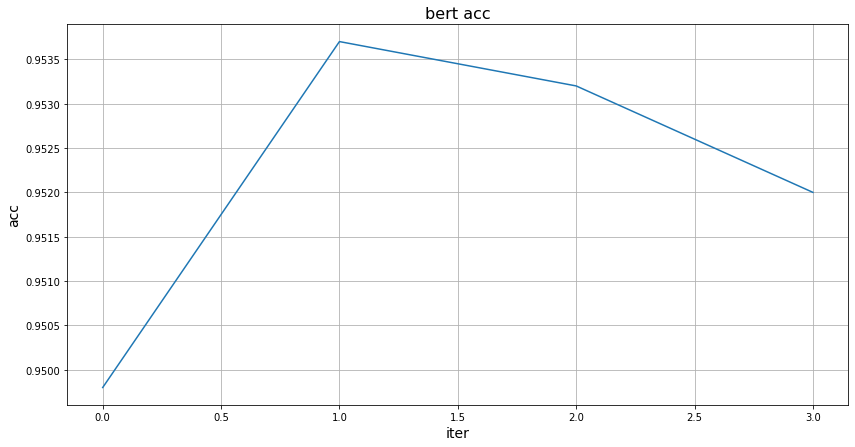

In [45]:
render_graphic("bert acc", "iter", "acc", [0, 1, 2, 3], [0.9498, 0.9537, 0.9532, 0.9520])

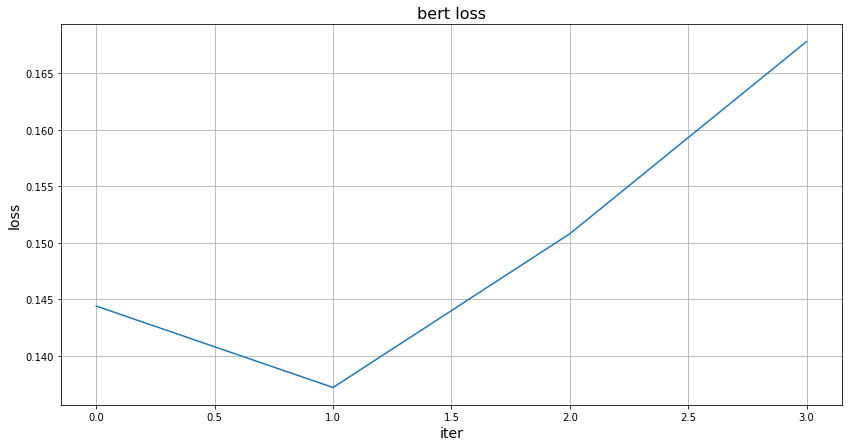

In [46]:
render_graphic("bert loss", "iter", "loss", [0, 1, 2, 3], [0.1444, 0.1372, 0.1508, 0.1678])

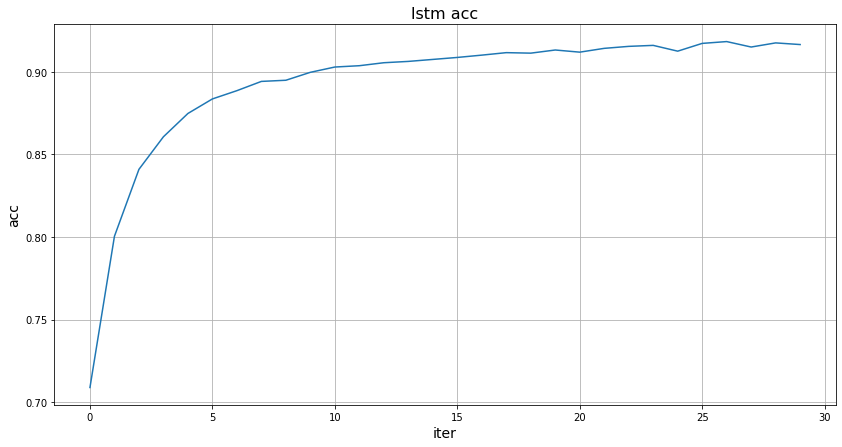

In [47]:
render_graphic("lstm acc", "iter", "acc", [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
                                          [0.7089, 0.8004, 0.8409, 0.8606, 0.8747, 0.8835, 0.8885, 0.8941, 0.8948, 0.8996, 0.9028, 0.9036, 0.9054, 0.9062, 0.9074, 0.9086, 0.9100, 0.9115, 0.9112, 0.9131, 0.9118, 0.9141, 0.9153, 0.9159, 0.9124, 0.9171, 0.9182, 0.9149, 0.9174, 0.9164])

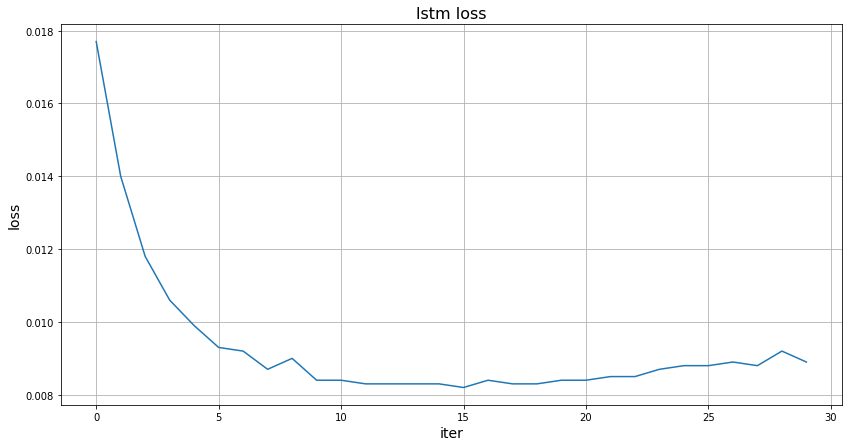

In [48]:
render_graphic("lstm loss", "iter", "loss", [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
                                          [0.0177, 0.0140, 0.0118, 0.0106, 0.0099, 0.0093, 0.0092, 0.0087, 0.0090, 0.0084, 0.0084, 0.0083, 0.0083, 0.0083, 0.0083, 0.0082, 0.0084, 0.0083, 0.0083, 0.0084, 0.0084, 0.0085, 0.0085, 0.0087, 0.0088, 0.0088, 0.0089, 0.0088, 0.0092, 0.0089])

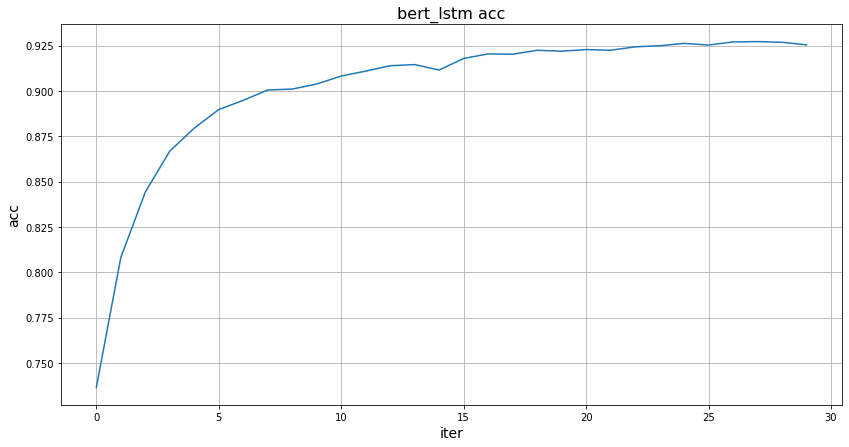

In [49]:
render_graphic("bert_lstm acc", "iter", "acc", [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
                                               [0.7364, 0.8081, 0.8442, 0.8668, 0.8795, 0.8897, 0.8948, 0.9005, 0.9010, 0.9038, 0.9082, 0.9109, 0.9139, 0.9145, 0.9115, 0.9179, 0.9204, 0.9202, 0.9224, 0.9219, 0.9228, 0.9224, 0.9243, 0.9249, 0.9262, 0.9253, 0.9270, 0.9272, 0.9268, 0.9254])

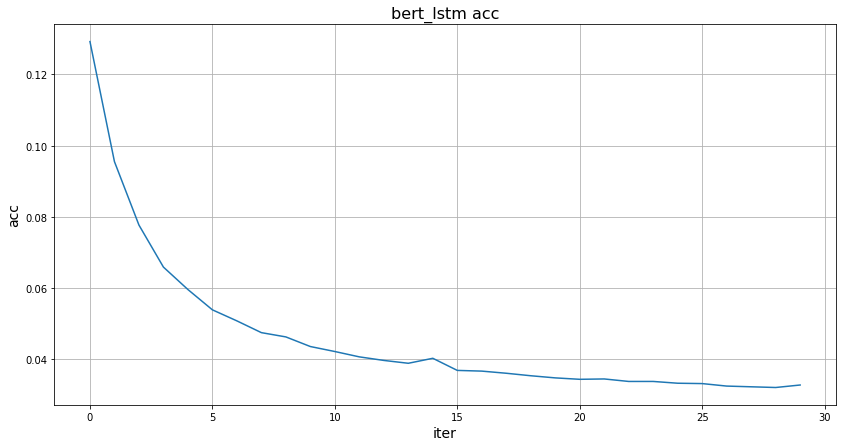

In [50]:
render_graphic("bert_lstm acc", "iter", "acc", [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
                                               [0.1292, 0.0955, 0.0777, 0.0659, 0.0596, 0.0539, 0.0508, 0.0475, 0.0463, 0.0436, 0.0422, 0.0407, 0.0397, 0.0389, 0.0403, 0.0369, 0.0367, 0.0361, 0.0354, 0.0348, 0.0344, 0.0345, 0.0338, 0.0338, 0.0333, 0.0332, 0.0325, 0.0323, 0.0321, 0.0328])